In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 한글처리
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수 - 표시 처리
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

In [9]:
from sklearn.datasets import load_breast_cancer, load_boston

# 1. 샘플 소개

+ pip install mglearn

In [2]:
import mglearn

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


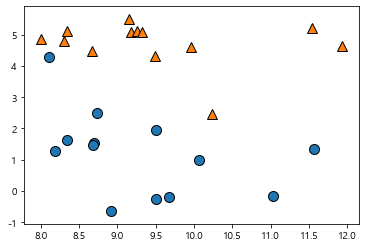

In [6]:
##### 이진 분류용 데이터 셋

X, y = mglearn.datasets.make_forge()

print(X)
print(y)

mglearn.discrete_scatter(X[:, 0], X[:,1], y)

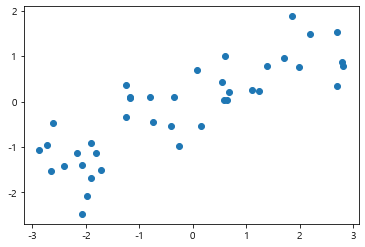

In [8]:
##### 선형 회귀용 데이터 셋

X, y = mglearn.datasets.make_wave(n_samples=40)

plt.plot(X, y, 'o')

In [18]:
##### 유방암 데이터 셋

cancer = load_breast_cancer()
#print(cancer)
print(cancer.keys())
print(cancer.target_names)
#print(cancer.DESCR)
print(cancer.feature_names)
print(cancer.data.shape)  # 데이터 갯수 , 변수 갯수

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
(569, 30)


In [19]:
##### 보스턴 집값 데이터 셋

boston = load_boston()
print(boston.keys())
print(boston.data.shape)  # 데이터 갯수 , 변수 갯수

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)


# 2. 용어 정리

+ 훈련 결과에 따라

        (1) 과대 적합 ( 변수가 너무 많아서 데이터가 복잡해진 경우 )
            - 훈련 데이터셋의 각 샘플에 너무 가깝게 맞춰져 있어서 복잡한 모델을 만들게 되는 것
            
        (2) 과소 적합 ( 변수가 너무 적어서 데이터가 쓸모없어진 경우 )
            - 너무 간단한 모델이 선택되는 것
            
        (3) 일반화 ( 변수가 너무 많지 않고 너무 적지도 않은 적당한 상태 )
            - 처음 보는 데이터에 대해서 정확하게 예측할 수 있는 것

# 3. KNN (K-Nearst Neighbors) - 머신러닝에서 K는 n개의 의미

### (1) 특징
        - 이해하기 쉽고 직관적인 모델
        - 더 복잡한 알고리즘을 적용하기 전에 시도해 볼 수 있는 알고리즘
        - 훈련 데이터셋이 너무 크면 예측이 느려진다.

C:\Users\alcls\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


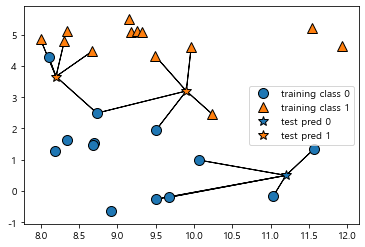

In [22]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

# 새로운 데이터가 입력되었을 때 가장 가까운 데이터의 타입에 따라서 타입을 분류, 예측
# (n_neighbors=3) 로 설정하면 가장 가까운 이웃(데이터) 3개에 따라서 다수결의 원칙에 의해 타입을 분류, 예측, 결정

### (2) L1 norm, L2 norm : 벡터의 크기 또는 길이를 측정

    1) L1 norm
        - 단순한 거리의 합
        - 맨하탄 거리
        
        
    2) L2 norm
        - 거리의 절대값의 합에 루트를 적용
        - 피타고라서 정리, 유클리드 거리

In [24]:
df = pd.DataFrame(np.random.randint(1, 10, size=(3, 2)))
df.columns = ['x', 'y']
df

,x,y
0,3,8
1,6,8
2,1,8
